In [1]:
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('data/titanic/train.csv')

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)


In [6]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [8]:
titanic_df = titanic_df.dropna()

In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<function matplotlib.pyplot.show(*args, **kw)>

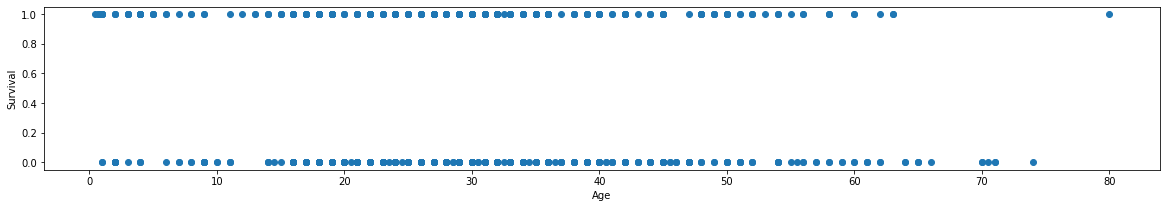

In [10]:
fig, ax = plt.subplots(figsize = (20,3))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])
plt.xlabel("Age")
plt.ylabel("Survival")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

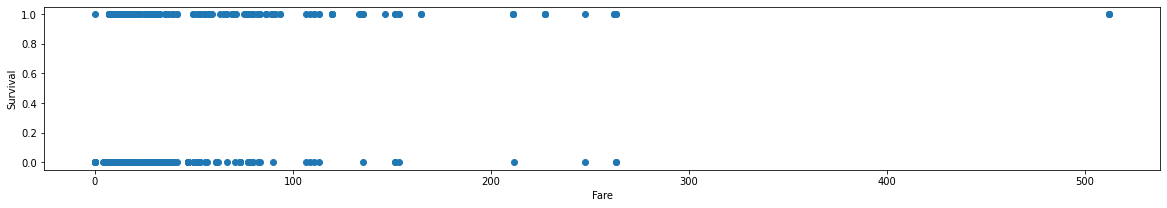

In [11]:
fig, ax = plt.subplots(figsize = (20,3))
plt.scatter(titanic_df['Fare'], titanic_df['Survived'])
plt.xlabel("Fare")
plt.ylabel("Survival")
plt.show

In [12]:
pd.crosstab(titanic_df['Sex'], titanic_df["Survived"])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [13]:
pd.crosstab(titanic_df["Pclass"], titanic_df["Survived"])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [14]:
titanic_corr = titanic_df.corr()

titanic_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


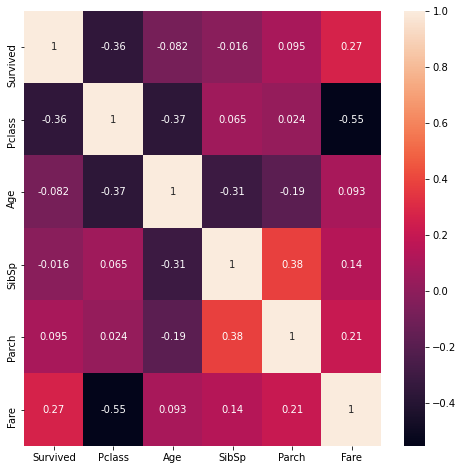

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(titanic_corr, annot= True)

In [16]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))
                                            
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [17]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [18]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [19]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

In [20]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,32.0,0,0,10.500,0,0,1
1,0,3,1,24.0,2,0,24.150,0,0,1
2,0,1,1,45.0,1,0,83.475,0,0,1
3,0,3,0,9.0,3,2,27.900,0,0,1
4,1,2,0,5.0,1,2,27.750,0,0,1


In [21]:
titanic_df.to_csv('data/titanic/processed.csv', index=False)

In [22]:
!ls -alih data/titanic | grep processed 

21550995 -rw-r--r--  1 ankitbhardwaj  staff    19K May  3 23:24 processed.csv


libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
